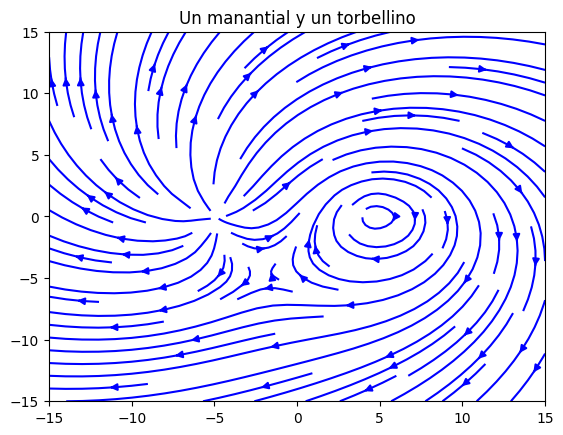

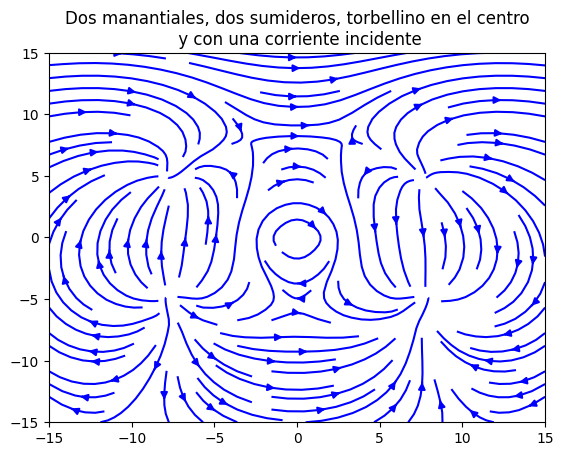

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import cmath as c

x=np.linspace(-15,15,20)
y=np.linspace(-15,15,20)
X,Y=np.meshgrid(x,y)
U,V=np.meshgrid(x,y)


Q=20
gamma=30
uinf=0
def f(t):
    return uinf*t+(1/(2*np.pi))*(Q*c.log(t+5)+gamma*1j*c.log(t-5))

def prima(f,t,epsilon=10**(-10)):
    return (f(t+epsilon)-f(t))/(epsilon)
    # return Q/(2*np.pi*t)

def uv(f,t):
    u=prima(f,t).real
    v=-prima(f,t).imag
    return u,v
def dibujar(f):
    for i in range(len(x)):
        for j in range(len(y)):
            t=complex(x[i],y[j])
            u,v=uv(f,t)
            U[j,i]=u
            V[j,i]=v
    
    fig,ax=plt.subplots()
    ax.streamplot(X,Y,U,V,color='blue')
    

dibujar(f)
plt.title('Un manantial y un torbellino')
plt.show()

Q=5
gamma=6
Uinf=.05
def f2(t):
    t0=[-7.5+5j,7.5+5j,-7.5-5j,7.5-5j]
    ms0=[-1,1,1,-1]
    f2=Uinf*t
    for i in range(len(t0)):
        f2+=ms0[i]*c.log(t-t0[i])
    f2*=(Q/(2*np.pi))
    f2+=(gamma/(2*np.pi))*1j*c.log(t)
    return f2
dibujar(f2)
plt.title('Dos manantiales, dos sumideros, torbellino en el centro\n y con una corriente incidente')
plt.show()

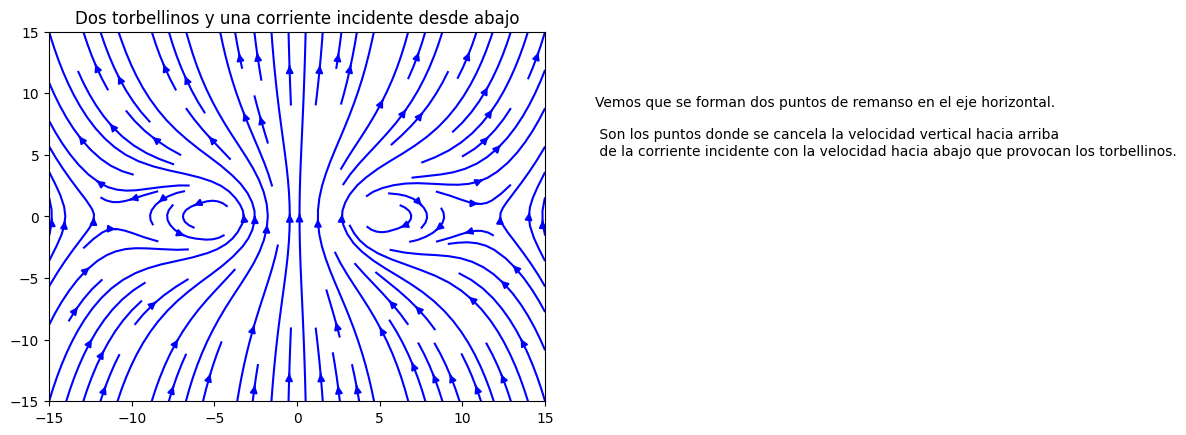

In [ ]:
Q=0.5
gamma=5
Vinf=-.5j
def f2(t):
    t0=[-5,5]
    mst0=[-gamma*1j,gamma*1j]
    f2=Vinf*t
    for i in range(len(t0)):
        f2+=mst0[i]*c.log(t-t0[i])
    f2*=(1/(2*np.pi))
    return f2
dibujar(f2)
plt.title('Dos torbellinos y una corriente incidente desde abajo')
plt.text(18,5,'Vemos que se forman dos puntos de remanso en el eje horizontal.\n\n Son los puntos donde se cancela la velocidad vertical hacia arriba\n de la corriente incidente con la velocidad hacia abajo que provocan los torbellinos.')
plt.show()

In [33]:


def integral(f,a=0,b=1,N=10**4):
    dx=abs(a-b)/N
    I=0
    for i in range(N):
        xi1=a+dx*i
        # xi2=a+dx*(i+1)
        I+=f(xi1)*dx
    return round(I,4)

# def MD(t):
#     a=0
#     b=1
#     def q(t):
#         return q
#     def dentrodeintegral(t0):
#         return q(t0)*c.log(t-t0)
#     return (1/2*np.pi)*integral(dentrodeintegral)

# dibujar(MD)